In [1]:
pip install pandas


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df=pd.read_csv("/Users/goutham/Desktop/Anamoly detection /dataset1.csv")
df

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX521,966.513408,4,991.978627,16,21,Saturday,2:00,45,Female,481890,Current
1,TX737,995.001511,3,968.087265,6,24,Thursday,19:00,49,Male,617231,Current
2,TX740,988.744990,4,983.152584,7,19,Tuesday,21:00,35,Female,733917,Current
3,TX660,1053.224138,3,1011.247366,6,29,Friday,3:00,59,Male,635468,Savings
4,TX411,939.441403,2,1014.615282,14,13,Thursday,19:00,40,Female,723177,Savings
...,...,...,...,...,...,...,...,...,...,...,...,...
195,TX408,999.012545,1,990.268402,17,10,Thursday,8:00,44,Male,1404417,Current
196,TX332,970.961111,1,1017.074261,12,21,Wednesday,6:00,58,Male,846495,Current
197,TX208,1055.409141,2,979.201882,16,23,Tuesday,20:00,18,Male,1325799,Current
198,TX613,912.181948,2,1003.573015,18,20,Saturday,16:00,59,Male,776379,Current


In [3]:
df.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX521,966.513408,4,991.978627,16,21,Saturday,2:00,45,Female,481890,Current
1,TX737,995.001511,3,968.087265,6,24,Thursday,19:00,49,Male,617231,Current
2,TX740,988.744990,4,983.152584,7,19,Tuesday,21:00,35,Female,733917,Current
3,TX660,1053.224138,3,1011.247366,6,29,Friday,3:00,59,Male,635468,Savings
4,TX411,939.441403,2,1014.615282,14,13,Thursday,19:00,40,Female,723177,Savings


In [4]:
df.isnull().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               200 non-null    object 
 1   Transaction_Amount           200 non-null    float64
 2   Transaction_Volume           200 non-null    int64  
 3   Average_Transaction_Amount   200 non-null    float64
 4   Frequency_of_Transactions    200 non-null    int64  
 5   Time_Since_Last_Transaction  200 non-null    int64  
 6   Day_of_Week                  200 non-null    object 
 7   Time_of_Day                  200 non-null    object 
 8   Age                          200 non-null    int64  
 9   Gender                       200 non-null    object 
 10  Income                       200 non-null    int64  
 11  Account_Type                 200 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.9+ KB


In [6]:
pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean and standard deviation
mean = df['Transaction_Amount'].mean()
std = df['Transaction_Amount'].std()

# Compute Z-score for each transaction
df['Z_score'] = (df['Transaction_Amount'] - mean) / std

# Define anomaly threshold (2 standard deviations from mean)
threshold = 2

# Flag anomalies
df['Anomaly'] = df['Z_score'].abs() > threshold

# Extract anomalies
anomalies = df[df['Anomaly'] == True]

# Show results
print(f"Total anomalies detected: {len(anomalies)}")
display(anomalies[['Transaction_ID', 'Transaction_Amount', 'Z_score']])


Total anomalies detected: 4


,Transaction_ID,Transaction_Amount,Z_score
39,TX59,2769.890232,6.345430
50,TX570,2973.267078,7.088058
79,TX307,3058.483023,7.399223
102,TX936,2833.966439,6.579403


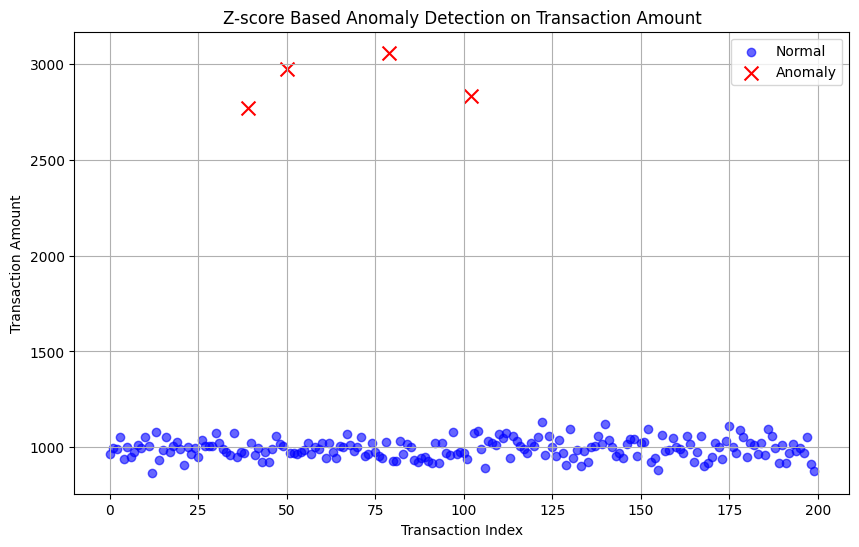

In [8]:
plt.figure(figsize=(10, 6))

# Normal transactions
plt.scatter(df[~df['Anomaly']].index, df[~df['Anomaly']]['Transaction_Amount'], 
            label='Normal', color='blue', alpha=0.6)

# Anomalies
plt.scatter(anomalies.index, anomalies['Transaction_Amount'], 
            label='Anomaly', color='red', marker='x', s=100)

plt.title('Z-score Based Anomaly Detection on Transaction Amount')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


✅ Dataset loaded successfully!
  Transaction_ID  Transaction_Amount  Transaction_Volume  \
0          TX521          966.513408                   4   
1          TX737          995.001511                   3   
2          TX740          988.744990                   4   
3          TX660         1053.224138                   3   
4          TX411          939.441403                   2   

   Average_Transaction_Amount  Frequency_of_Transactions  \
0                  991.978627                         16   
1                  968.087265                          6   
2                  983.152584                          7   
3                 1011.247366                          6   
4                 1014.615282                         14   

   Time_Since_Last_Transaction Day_of_Week Time_of_Day  Age  Gender  Income  \
0                           21    Saturday        2:00   45  Female  481890   
1                           24    Thursday       19:00   49    Male  617231   
2         

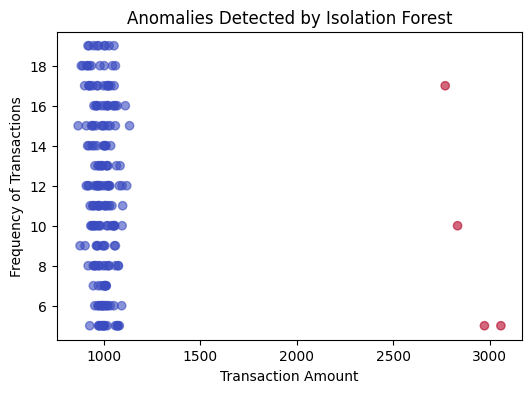

✅ Model training complete and files saved successfully!


In [10]:
# === Import all dependencies ===
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score
import joblib

# === Load the dataset ===
# Make sure "dataset1.csv" is in the same folder as this notebook
df = pd.read_csv("/Users/goutham/Desktop/Anamoly detection /dataset1.csv")
print("✅ Dataset loaded successfully!")
print(df.head())

# === Select features ===
features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']
X = df[features]

# === Scale features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train Isolation Forest ===
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
df['Anomaly_IF'] = iso_forest.fit_predict(X_scaled)

# Convert anomalies (1 = normal, -1 = anomaly)
df['Anomaly_IF'] = df['Anomaly_IF'].map({1: 0, -1: 1})

# === Visualize results ===
plt.figure(figsize=(6, 4))
plt.scatter(df['Transaction_Amount'], df['Frequency_of_Transactions'],
            c=df['Anomaly_IF'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency of Transactions')
plt.title('Anomalies Detected by Isolation Forest')
plt.show()

# === Save model and scaler ===
joblib.dump(iso_forest, "detector_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model training complete and files saved successfully!")


In [12]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly'] = model.fit_predict(X_scaled)

# Replace -1/1 with 1/0 if you prefer
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.50      0.67         4

    accuracy                           0.95        40
   macro avg       0.97      0.75      0.82        40
weighted avg       0.95      0.95      0.94        40

ROC-AUC Score: 0.9722222222222223


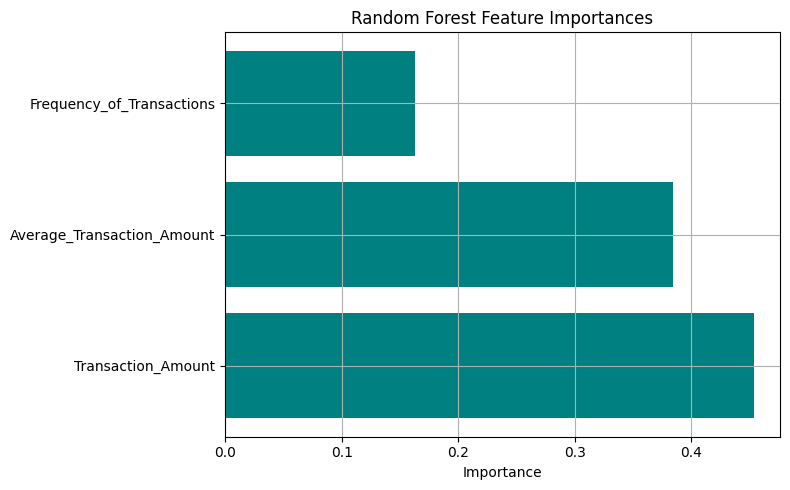

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Select features and target
features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']
X = df[features]
y = df['Anomaly']  # Ensure this column exists with both 0s and 1s

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (use stratify to avoid ROC-AUC issues)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Check and compute ROC-AUC safely
if len(np.unique(y_test)) == 2:
    y_probs = rf_model.predict_proba(X_test)[:, 1]
    print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))
else:
    print("ROC-AUC cannot be calculated: only one class present in y_test")

# Feature Importances
importances = rf_model.feature_importances_
feature_names = features

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='teal')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
pip install tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
print(df.columns)

Index(['Transaction_ID', 'Transaction_Amount', 'Transaction_Volume',
       'Average_Transaction_Amount', 'Frequency_of_Transactions',
       'Time_Since_Last_Transaction', 'Day_of_Week', 'Time_of_Day', 'Age',
       'Gender', 'Income', 'Account_Type', 'Anomaly_IF', 'Anomaly'],
      dtype='object')


In [16]:
categorical_cols = ['Day_of_Week', 'Time_of_Day', 'Gender', 'Account_Type']

In [17]:
df.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type,Anomaly_IF,Anomaly
0,TX521,966.513408,4,991.978627,16,21,Saturday,2:00,45,Female,481890,Current,0,0
1,TX737,995.001511,3,968.087265,6,24,Thursday,19:00,49,Male,617231,Current,0,0
2,TX740,988.744990,4,983.152584,7,19,Tuesday,21:00,35,Female,733917,Current,0,0
3,TX660,1053.224138,3,1011.247366,6,29,Friday,3:00,59,Male,635468,Savings,0,0
4,TX411,939.441403,2,1014.615282,14,13,Thursday,19:00,40,Female,723177,Savings,0,0


Isolation Forest Evaluation:
ROC-AUC Score: 1.0000
PR-AUC Score: 1.0000
F1 Score: 1.0000


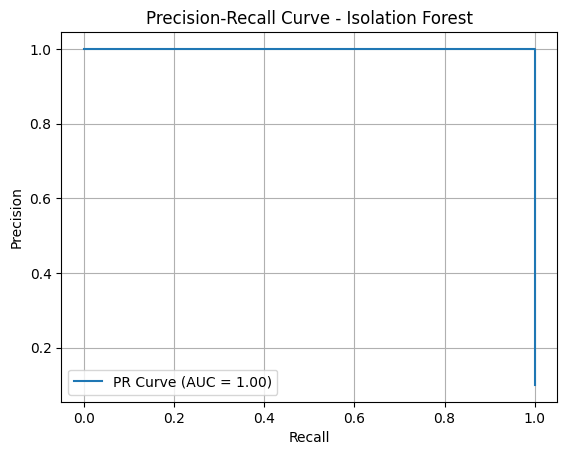

In [18]:
#model evaluation
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# ---- Isolation Forest ----
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train)

# Get anomaly scores and predictions
iso_scores = -iso_forest.decision_function(X_test)  # higher = more anomalous
iso_preds = iso_forest.predict(X_test)
iso_preds = np.where(iso_preds == -1, 1, 0)  # 1 = anomaly, 0 = normal

# Evaluation
roc_auc = roc_auc_score(y_test, iso_scores)
precision, recall, _ = precision_recall_curve(y_test, iso_scores)
pr_auc = auc(recall, precision)
f1 = f1_score(y_test, iso_preds)

# Print results
print("Isolation Forest Evaluation:")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"PR-AUC Score: {pr_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot Precision-Recall Curve
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Isolation Forest')
plt.legend()
plt.grid()
plt.show()

In [19]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Load the dataset
data = pd.read_csv("/Users/goutham/Desktop/Anamoly detection /dataset1.csv")

# Select relevant features
features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']
data = data[features].dropna()

# Train Isolation Forest assuming 4 anomalies out of 200
contamination_ratio = 4 / len(data)
model = IsolationForest(contamination=contamination_ratio, random_state=42)
model.fit(data)

# Predict and show anomalies
data['Prediction'] = model.predict(data[features])  # -1 = anomaly, 1 = normal
anomalies = data[data['Prediction'] == -1]
normals = data[data['Prediction'] == 1]

print("=== Anomaly Detection System ===")
print(f"Model detected {len(anomalies)} anomalies out of {len(data)} total transactions.\n")

# Show the 4 anomalies
print("🔎 Detected Anomalous Transactions:\n")
print(anomalies[features])

print("\nYou can test these values manually below.\nType 'exit' at any time to quit.\n")

# Interactive CLI prediction
while True:
    try:
        ta = input("Transaction Amount: ")
        if ta.lower() == 'exit':
            break
        ata = input("Average Transaction Amount: ")
        if ata.lower() == 'exit':
            break
        freq = input("Frequency of Transactions: ")
        if freq.lower() == 'exit':
            break

        # Format user input
        input_data = pd.DataFrame([[float(ta), float(ata), float(freq)]], columns=features)
        prediction = model.predict(input_data)[0]

        if prediction == -1:
            print("⚠ Anomalous Transaction Detected!\n")
        else:
            print("✅ Transaction is Normal.\n")

    except ValueError:
        print("❌ Invalid input. Please enter numeric values only.\n")

=== Anomaly Detection System ===
Model detected 4 anomalies out of 200 total transactions.

🔎 Detected Anomalous Transactions:

     Transaction_Amount  Average_Transaction_Amount  Frequency_of_Transactions
39          2769.890232                 1007.261392                         17
50          2973.267078                  972.715045                          5
79          3058.483023                  984.552604                          5
102         2833.966439                 1039.255925                         10

You can test these values manually below.
Type 'exit' at any time to quit.

⚠ Anomalous Transaction Detected!

